In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("laptop_price.csv", encoding='ISO-8859-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [4]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

laptop_ID
1       1
867     1
885     1
884     1
883     1
       ..
440     1
439     1
438     1
437     1
1320    1
Name: count, Length: 1303, dtype: int64


Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64


Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB 

In [6]:
df['Price_indian_rupee'] = df['Price_euros'] * 97
df['Price_indian_rupee'].head()

0    129949.93
1     87197.18
2     55775.00
3    246132.65
4    174949.20
Name: Price_indian_rupee, dtype: float64

In [7]:
df.drop('Price_euros',axis=1,inplace = True)

In [8]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_indian_rupee
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,129949.93
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,87197.18
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,55775.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,246132.65
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,174949.20


In [9]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [10]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [11]:
df.describe()

,laptop_ID,Inches,Ram,Weight,Price_indian_rupee
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,8.382195,2.038734,108997.638181
std,381.172104,1.426304,5.084665,0.665475,67803.877126
min,1.000000,10.100000,2.000000,0.690000,16878.000000
25%,331.500000,14.000000,4.000000,1.500000,58103.000000
50%,659.000000,15.600000,8.000000,2.040000,94769.000000
75%,990.500000,15.600000,8.000000,2.300000,144324.360000
max,1320.000000,18.400000,64.000000,4.700000,591603.000000


In [12]:
df.loc[:, ['Ram', 'Weight']].head(10)

,Ram,Weight
0,8,1.37
1,8,1.34
2,8,1.86
3,16,1.83
4,8,1.37
5,4,2.10
6,16,2.04
7,8,1.34
8,16,1.30
9,8,1.60


In [13]:
df.Memory.value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [14]:
def convert_memory(mem_str):
    mem_str = mem_str.replace('GB', '').replace('TB', '000')
    parts = mem_str.split('+')
    total = 0
    for part in parts:
        part = part.strip()
        if 'SSD' in part or 'HDD' in part or 'Flash Storage' in part or 'Hybrid' in part:
            digits = ''.join(filter(str.isdigit, part))
            if digits:
                total += int(digits)
    return total

df['Memory'] = df['Memory'].apply(convert_memory)

In [15]:
df.Memory

0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302     500
Name: Memory, Length: 1303, dtype: int64

In [16]:
df['Cpu_brand'] = df['Cpu'].apply(lambda x: x.split()[0])

In [17]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [20]:
features = ['Company', 'TypeName', 'Inches', 'Ram', 'Memory', 'Weight', 'Cpu_brand', 'Gpu_brand', 'OpSys']
X = df[features]
y = df['Price_indian_rupee']

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_cols = ['Inches', 'Ram', 'Memory', 'Weight']
categorical_cols = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'OpSys']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.head()

,Company,TypeName,Inches,Ram,Memory,Weight,Cpu_brand,Gpu_brand,OpSys
10,HP,Notebook,15.6,4,500,1.86,Intel,Intel,No OS
147,Asus,Notebook,15.6,4,1000,2.00,Intel,Intel,Windows 10
1287,HP,Notebook,15.6,6,1000,2.19,Intel,AMD,Windows 10
767,Dell,Gaming,15.6,16,1128,2.72,Intel,Nvidia,Windows 10
816,Razer,Ultrabook,12.5,16,512,1.29,Intel,Intel,Windows 10


In [25]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Inches', 'Ram', 'Memory',
                                                   'Weight']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu_brand',
                                                   'OpSys'])])),
                ('regressor', LinearRegression())])

In [26]:
y_pred = model.predict(X_test)
y_pred[:50]

array([ 98045.88385973,  94092.75065849,  61910.76047284, 106459.6266076 ,
       113220.4682693 , 133257.3199411 ,  70154.45836576,  68221.21244902,
       136380.55502206,  49172.83343989, 195150.27647049,  75989.2604967 ,
       125545.97658068,  68938.78595658, 169598.83751144, 132595.9537125 ,
       141055.42682308,  95624.33314807, 123084.03064855, 191533.18264178,
       208604.72609791,  58702.99146188, 130612.63821395,  30577.86713184,
       134892.09516996, 167280.82576851,  60638.03054926,  60238.03094663,
       133523.98634285,  90001.0662696 ,  79185.33194176, 145356.57292374,
       138133.7387836 , 120817.13319195, 103532.20764352,  76808.13274274,
        70259.06566668,  46127.35968033, 127380.35629439,   1812.67031524,
       155650.36563761,  62148.44838363, 118041.671195  , 206702.7614538 ,
        64729.44196811,  90001.0662696 , 185038.61914629,  52865.20878414,
        93734.39589412, 132944.08386003])

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 1451013560.56
R² Score: 0.70


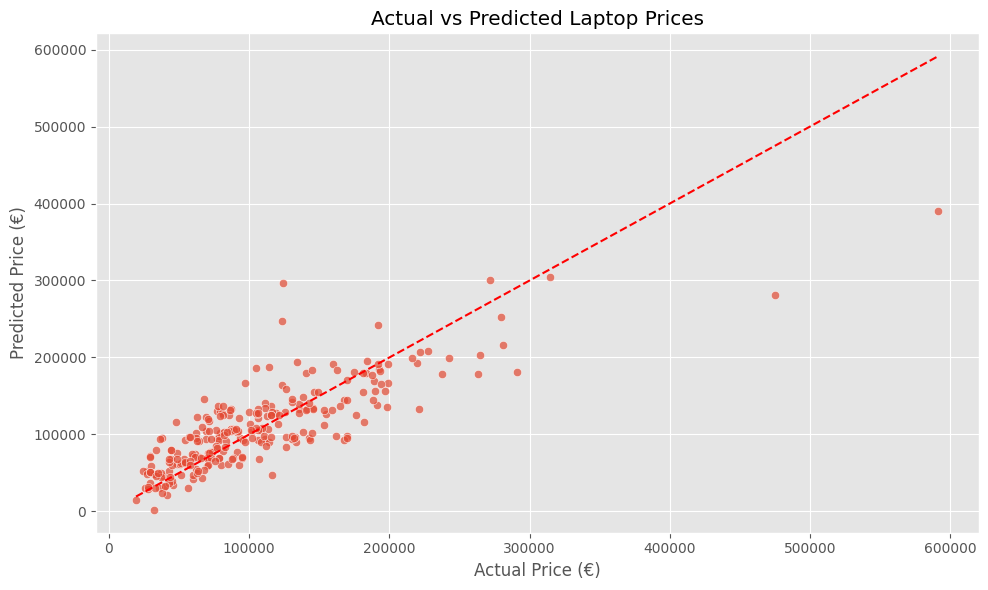

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("Actual vs Predicted Laptop Prices")
plt.tight_layout()
plt.show()


In [29]:
import joblib
joblib.dump(model, 'laptop_price_model.joblib')

['laptop_price_model.joblib']